# Part 3: NLP

In [90]:
import numpy as np
import pandas as pd
import re
import calendar

import seaborn as sns
import matplotlib.style as style

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

style.use('fivethirtyeight')

In [91]:
us_cost_living_df = pd.read_csv('./data/us_cost_living.csv')
df = pd.read_csv('./data/combined_data.csv')

In [92]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'job_title', 'salary', 'company',
       'location', 'is_remote', 'job_rating', 'job_summary', 'post_date',
       'extract_date', 'job_url', 'rate_by', 'min', 'max', 'adjusted_salary',
       'yearly_adjusted_salary', 'salary_bins', 'City', 'Cost of Living Index',
       'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [93]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','City'], inplace=True)

In [99]:
df['Cost of Living Index'].quantile(list(np.linspace(0,1,4)))

0.000000     57.94
0.333333     71.81
0.666667     79.82
1.000000    100.00
Name: Cost of Living Index, dtype: float64

In [95]:
cut_bins = [57, 71.81, 79, 100]
cut_labels = 

df['city_bins'] = pd.qcut(x=df['Cost of Living Plus Rent Index'], q = 4)
df['city_bins'].value_counts().sort_index(ascending = False)

(76.31, 100.72]    214
(61.88, 76.31]     236
(55.66, 61.88]     215
(40.619, 55.66]    241
Name: city_bins, dtype: int64

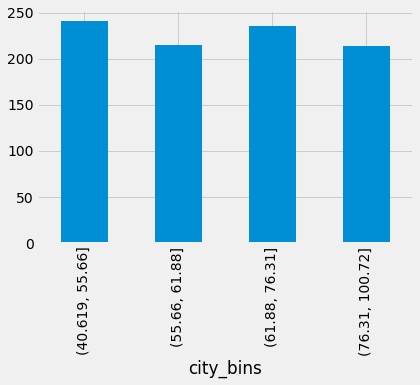

In [97]:
df.groupby('city_bins')['location'].count().plot.bar()

In [67]:
# sal_bins = [0,50000,100000,150000,200000,250000,300000,350000,70000,90000,120000,150000,400000]
# df['Salary_Bins'] = pd.cut(x=df['adjusted_yearly_salary'], bins=sal_bins, labels=False)
df['adjusted_salary'].value_counts().sort_index(ascending = False)

500000.00    1
312500.00    2
270000.00    1
260000.00    1
240682.00    1
            ..
12.50        1
12.00        1
10.81        1
10.00        2
7.25         2
Name: adjusted_salary, Length: 697, dtype: int64

In [68]:
# sal_bins = [0, 125000, 250000, 375000, 500000]
# df['salary_bins'] = pd.cut(x=df['yearly_adjusted_salary'], bins=sal_bins, labels=False)

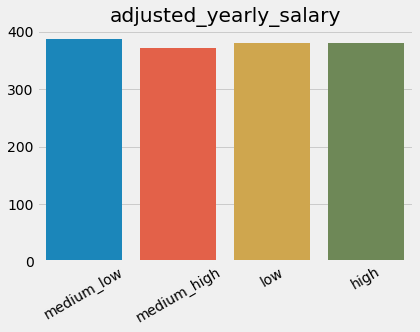

In [72]:
g = df['salary_bins'].value_counts().sort_index(ascending = False)
sns.barplot(x = g.index, y=g.values)
plt.title("adjusted_yearly_salary")
plt.xticks(rotation=30);

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
y = df['salary_bins'].astype('category')


In [78]:
X_train, X_test, y_train, y_test = train_test_split(df['job_title'], y, test_size=0.2)

In [79]:
#use count vectorizer to examine title

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=0.03)

In [80]:
cv

CountVectorizer(min_df=0.03, ngram_range=(1, 3), stop_words='english')

In [81]:
#fitting count vectorizer to job title

cv.fit(X_train)

title_words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())

In [82]:
title_words.head()

,analyst,business,business analyst,data,data analyst,data scientist,engineer,intelligence,learning,machine,...,management,program,program analyst,research,scientist,senior,senior data,software,software engineer,sr
0,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [83]:
word_observe = pd.concat([title_words, y_train], axis=1)

word_observe.head()

,analyst,business,business analyst,data,data analyst,data scientist,engineer,intelligence,learning,machine,...,program,program analyst,research,scientist,senior,senior data,software,software engineer,sr,salary_bins
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium_high
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium_low


In [84]:
for i in range(0,7):
    word_count = word_observe[word_observe['salary_bins']==i].sum(axis=0)
    print(i, "Bin most common words:")
    cw = word_count.sort_values(ascending=False).head(30)
    print(cw)

0 Bin most common words:
salary_bins          0.0
sr                   0.0
business             0.0
business analyst     0.0
data                 0.0
data analyst         0.0
data scientist       0.0
engineer             0.0
intelligence         0.0
learning             0.0
machine              0.0
machine learning     0.0
management           0.0
program              0.0
program analyst      0.0
research             0.0
scientist            0.0
senior               0.0
senior data          0.0
software             0.0
software engineer    0.0
analyst              0.0
dtype: float64
1 Bin most common words:
salary_bins          0.0
sr                   0.0
business             0.0
business analyst     0.0
data                 0.0
data analyst         0.0
data scientist       0.0
engineer             0.0
intelligence         0.0
learning             0.0
machine              0.0
machine learning     0.0
management           0.0
program              0.0
program analyst      0.0
research  